<a href="https://www.kaggle.com/code/tarikemre/cardio?scriptVersionId=157246846" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio-activities/cardioActivities.csv


In [2]:
data = pd.read_csv("/kaggle/input/cardio-activities/cardioActivities.csv", index_col="Type")

In [3]:
data.head()

,Date,Activity Id,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Type,,,,,,,,,,,,,
Running,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
Running,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
Running,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
Running,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
Running,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


## data cleaning and prepare 

In [4]:
data.isnull().sum()

Date                          0
Activity Id                   0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

In [5]:
data = data.drop(["Route Name","Friend's Tagged","Notes","GPX File","Activity Id", "Date"],axis=1)

In [6]:
data

,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Type,,,,,,,
Running,10.44,58:40,5:37,10.68,774.0,130,159.0
Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0
Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0
Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0
Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0
...,...,...,...,...,...,...,...
Walking,1.57,13:39,8:41,6.91,926743.0,7,NaN
Walking,1.48,17:56,12:09,4.94,942192.0,12,NaN
Walking,1.49,13:43,9:14,6.49,924486.0,9,NaN


In [7]:
def convert_duration_to_float(duration):
    parts = duration.split(':')
    if len(parts) == 2:
        # Sadece dakika ve saniye varsa
        minutes, seconds = map(int, parts)
        return minutes * 60 + seconds
    elif len(parts) == 3:
        # Saat, dakika ve saniye varsa
        hours, minutes, seconds = map(int, parts)
        return hours * 3600 + minutes * 60 + seconds
    else:
        return None

In [8]:
data['Duration_Float'] = data['Duration'].apply(convert_duration_to_float)

In [9]:
data = data.drop(["Duration","Average Pace"],axis=1)

In [10]:
data.head()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Duration_Float
Type,,,,,,
Running,10.44,10.68,774.0,130,159.0,3520
Running,12.84,10.39,954.0,168,159.0,4452
Running,13.01,10.37,967.0,171,155.0,4516
Running,12.98,10.47,960.0,169,158.0,4465
Running,13.02,10.73,967.0,170,154.0,4370


In [11]:
data.isnull().sum()

Distance (km)                 0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Duration_Float                0
dtype: int64

In [12]:
meanAVG_HR = data["Average Heart Rate (bpm)"].mean()

In [13]:
data["Average Heart Rate (bpm)"].fillna(meanAVG_HR,inplace=True)

In [14]:
data.head()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Duration_Float
Type,,,,,,
Running,10.44,10.68,774.0,130,159.0,3520
Running,12.84,10.39,954.0,168,159.0,4452
Running,13.01,10.37,967.0,171,155.0,4516
Running,12.98,10.47,960.0,169,158.0,4465
Running,13.02,10.73,967.0,170,154.0,4370


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [16]:
y = data["Distance (km)"].values

In [17]:
x = data.drop(["Distance (km)"], axis=1).values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
x_train = scaler.fit_transform(x_train)

In [23]:
x_test = scaler.transform(x_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
x_train.shape

(355, 5)

In [26]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [27]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=10,epochs=100)

Epoch 1/100
36/36 [==============================] - 2s 9ms/step - loss: 176.1587 - val_loss: 164.3852
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 169.2642 - val_loss: 155.2263
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 157.0851 - val_loss: 139.1573
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 135.7826 - val_loss: 111.8789
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 102.0944 - val_loss: 72.8277
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 62.3815 - val_loss: 37.3032
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 36.8706 - val_loss: 26.2627
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 31.7601 - val_loss: 25.2622
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 30.4576 - val_loss: 23.7447
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 27.9621 

In [28]:
loss = pd.DataFrame(model.history.history)

In [29]:
loss.head()

,loss,val_loss
0,176.158676,164.385178
1,169.264221,155.226303
2,157.085114,139.157257
3,135.782593,111.878906
4,102.094444,72.827690


<Axes: >

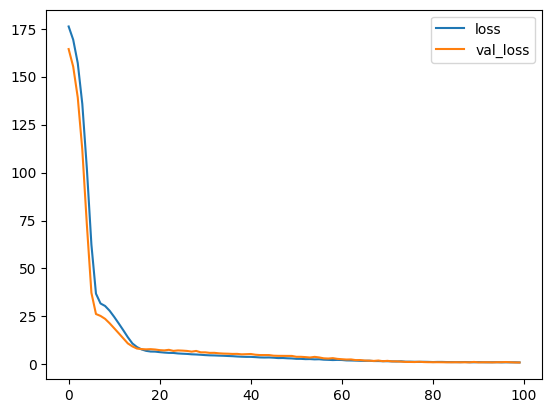

In [30]:
loss.plot()

In [31]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)


5/5 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)

print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')


MSE (Train): 0.969779528229684
MSE (Test): 0.9961077394333653


In [33]:
data.head()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Duration_Float
Type,,,,,,
Running,10.44,10.68,774.0,130,159.0,3520
Running,12.84,10.39,954.0,168,159.0,4452
Running,13.01,10.37,967.0,171,155.0,4516
Running,12.98,10.47,960.0,169,158.0,4465
Running,13.02,10.73,967.0,170,154.0,4370


In [34]:
newDistance = pd.DataFrame({"Average Speed (km/h)" : [15], "Calories Burned" : [1200], "Climb (m)" : [180], "Average Heart Rate (bpm)" : [160],
                          "Duration_Float" : [5500]})

In [35]:
newDistance

,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Duration_Float
0,15,1200,180,160,5500


In [36]:
newDistance = scaler.transform(newDistance.values.reshape(-1,5))

In [37]:
model.predict(newDistance) # According to the values ​​given, he estimates that he ran 19 km

1/1 [==============================] - 0s 22ms/step


array([[21.541317]], dtype=float32)

In [38]:
newDistance2 = data.drop("Distance (km)",axis=1).iloc[2]

In [39]:
newDistance2

Average Speed (km/h)          10.37
Calories Burned              967.00
Climb (m)                    171.00
Average Heart Rate (bpm)     155.00
Duration_Float              4516.00
Name: Running, dtype: float64

In [40]:
newDistance2 = scaler.transform(newDistance2.values.reshape(-1,5))

In [41]:
forecastedData = model.predict(newDistance2)

1/1 [==============================] - 0s 22ms/step


In [42]:
print("actual data of [2]  ", data["Distance (km)"].iloc[2] )
print("forecasted data of [2] ",forecastedData)

actual data of [2]   13.01
forecasted data of [2]  [[12.935704]]


In [43]:
#I think you found almost similar values, it could be better but how :) thx for reviewing..